In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
df = pd.read_csv('EcommerceCustomers.csv')

In [4]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


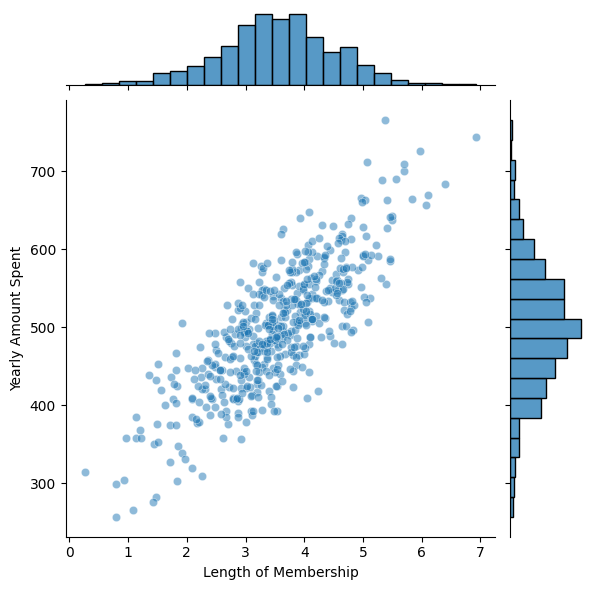

In [7]:
sns.jointplot(x = 'Length of Membership', y = 'Yearly Amount Spent', data = df, alpha = 0.5)

# [People with length of membership was around 3-4-5  months were the most active buying products.
# correlation exists.

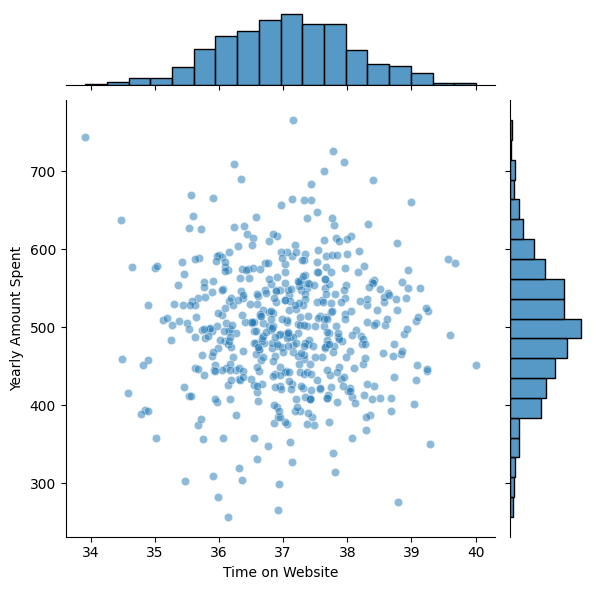

In [8]:
sns.jointplot(x = 'Time on Website', y = 'Yearly Amount Spent', data = df, alpha = 0.5)

# not much correlation 

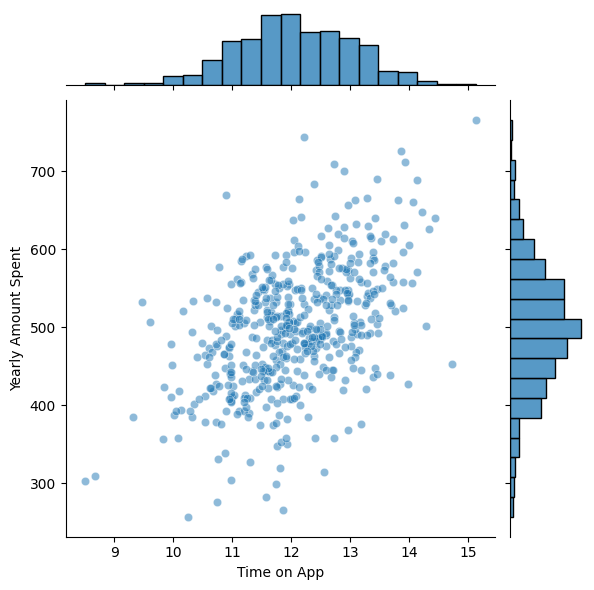

In [9]:
sns.jointplot(x = 'Time on App', y = 'Yearly Amount Spent', data = df, alpha = 0.5)

# comparatively better correlation. 
# more the time spent on the app, higher yearly amt spent.

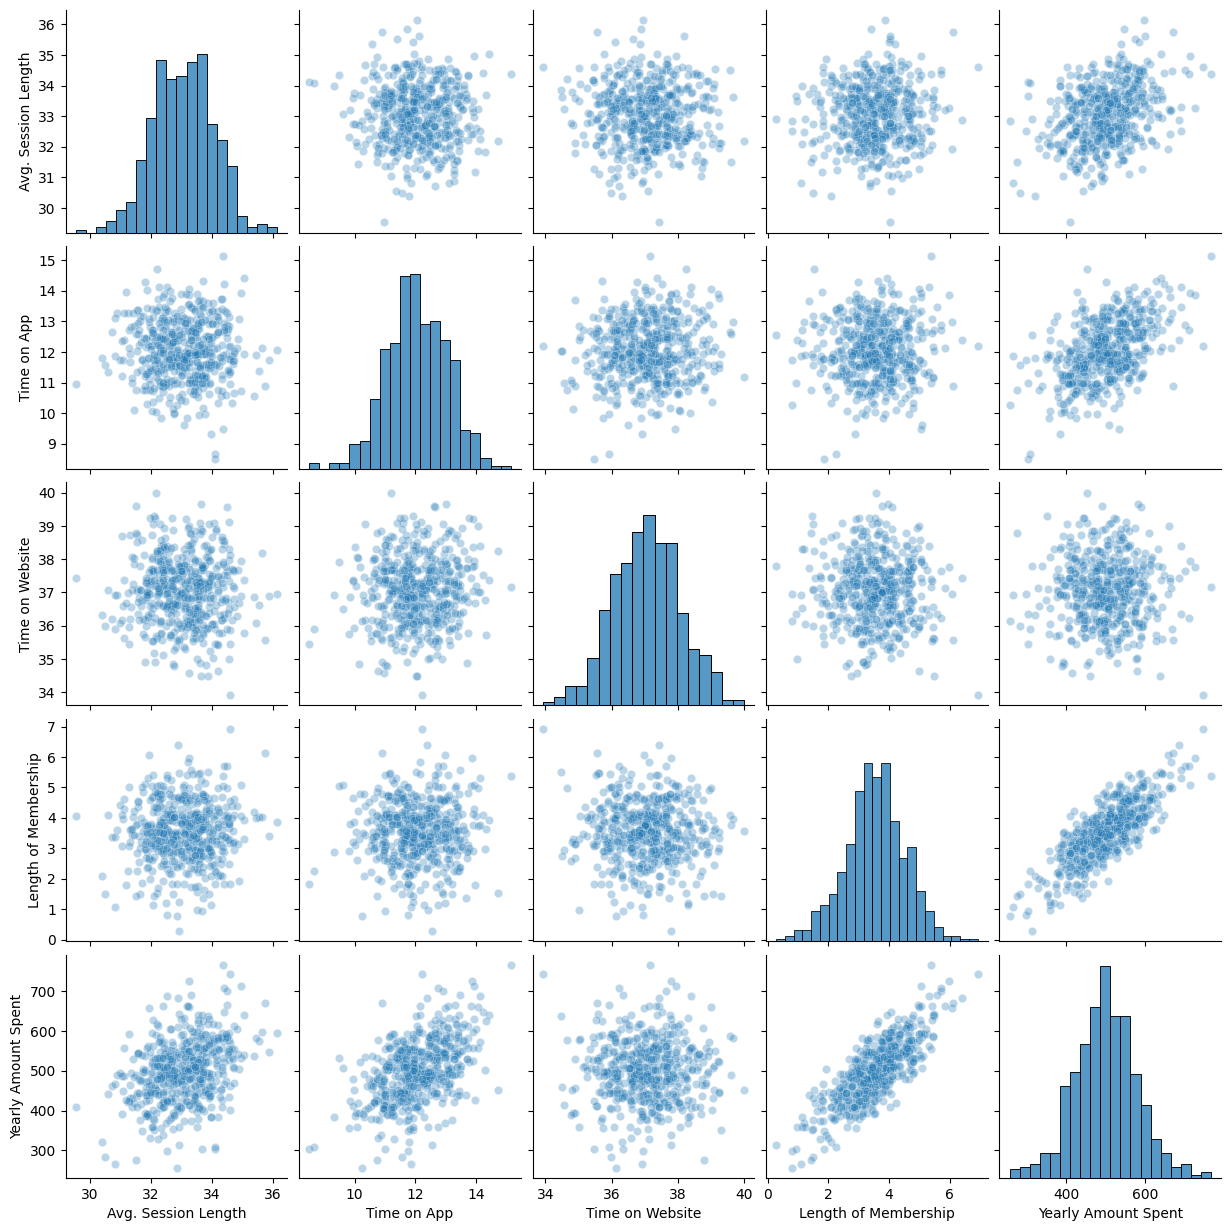

In [10]:
sns.pairplot(data=df, kind = 'scatter', plot_kws={'alpha': 0.3})

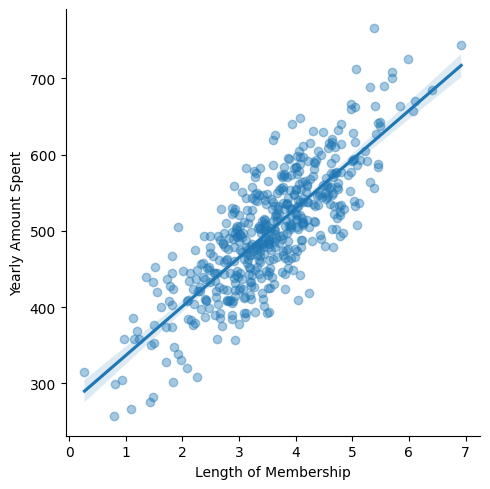

In [11]:
sns.lmplot(x = 'Length of Membership', y = 'Yearly Amount Spent', data = df, scatter_kws = {'alpha': 0.4})

In [13]:
from sklearn.model_selection import train_test_split

In [ ]:
x = df[['Avg. Session Length','Time on App', 'Time on Website', 'Length of Membership']]   # predictors. independent.
y = df['Yearly Amount Spent']  # target. dependent.

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2006)

In [17]:
# training the model.
# teaching a ml algorithm to recognize patterns and make decisions based on the data we provide

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lm = LinearRegression()

In [20]:
lm.fit(x_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


y = b0+b1x1+b2x2+...
coefficients (coef_): b1, b2, .....
intercept (intercept_): b0
Coefficient represents the change in output for a unit change in input, whereas intercept represents the value of output when all inputs are zero.
Yearly Amount Spent=b0​+25.72(Avg Session)+38.59(Time on App)+0.46(Time on Website)+61.67(Membership length)

In [21]:
lm.coef_

array([25.94053966, 38.67587466,  0.48987111, 61.34618761])

In [22]:
c_df = pd.DataFrame(lm.coef_, x.columns, columns = ['coef'])
c_df

# eg1 for a unit change in time on app, yearly amount spent increases by 25.94
# eg2 for a unit inc in time on web, yearly amt spent inc by 0.489

,coef
Avg. Session Length,25.940540
Time on App,38.675875
Time on Website,0.489871
Length of Membership,61.346188


In [23]:
lm.intercept_    # yearly amt spent when all features/predictors = 0

np.float64(-1059.1841071521708)

predictions

In [ ]:
predictions = lm.predict(x_test)

In [25]:
predictions

array([535.20959473, 315.98916718, 397.90337173, 394.19641437,
       478.79278611, 548.73170872, 500.94186695, 445.78586646,
       426.99221233, 512.11584367, 480.54274575, 451.78978076,
       255.44475486, 404.97054318, 543.1958895 , 443.36043376,
       571.54680599, 590.02477353, 482.40958196, 641.48552286,
       588.63926992, 437.46652374, 531.6071189 , 441.30053764,
       588.41589934, 513.4195547 , 572.43495904, 518.62777052,
       491.5294779 , 606.69063584, 478.37326521, 429.43657562,
       455.93173113, 458.62431457, 531.93359252, 451.74751287,
       597.4673982 , 553.89203092, 463.13399638, 481.43345747,
       376.66785102, 478.974945  , 409.28896344, 460.5364849 ,
       495.48099117, 645.96886978, 398.44687249, 472.18835134,
       466.29319282, 528.4230034 , 450.07327078, 502.33073151,
       418.04524165, 384.12830139, 408.87484483, 503.65901582,
       510.33500273, 609.52975915, 422.34045872, 529.9153079 ,
       549.83460152, 487.17108998, 387.7906478 , 616.34

In [26]:
comparison = pd.DataFrame({
    "Actual": y_test.values, 
    "Predicted": predictions
})
comparison

,Actual,Predicted
0,524.797628,535.209595
1,308.527747,315.989167
2,392.285244,397.903372
3,388.940549,394.196414
4,460.061277,478.792786
...,...,...
145,503.175085,493.272807
146,470.452733,460.485733
147,506.375867,495.335165
148,532.717486,537.934131


Text(0.5, 1.0, 'Evaluation of linear regression model')

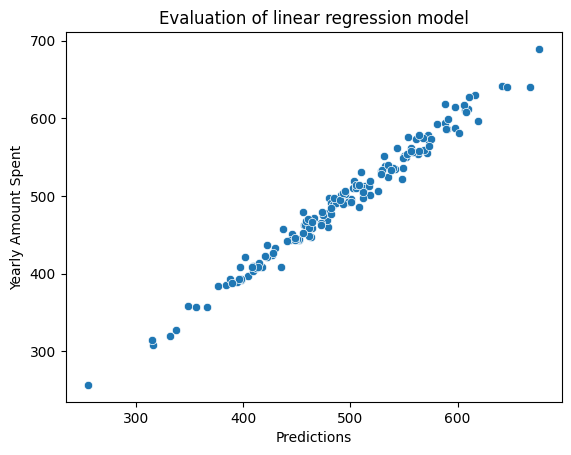

In [30]:
sns.scatterplot(x = predictions, y = y_test)
plt.xlabel("Predictions")
plt.title("Evaluation of linear regression model")

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

- MAE: Average of absolute differences between actual and predicted values; easy to interpret and less sensitive to outliers.
- MSE: Average of squared differences; heavily penalizes large errors and is useful during model training.
- RMSE: Square root of MSE; in the same unit as the target and shows typical prediction error.

In [32]:
print("Mean absolute error: ", mean_absolute_error(y_test, predictions))
print("Mean squared error: ", mean_squared_error(y_test, predictions))
print("Root mean squared error (RMSE): ", math.sqrt(mean_squared_error(y_test, predictions)))

Mean absolute error:  7.934638361565467
Mean squared error:  106.31464347915876
Root mean squared error (RMSE):  10.310899256571114


residuals  
Residual = Actual value − Predicted value

In [33]:
residuals = y_test - predictions

In [34]:
residuals

255   -10.411967
442    -7.461421
463    -5.618127
456    -5.255866
144   -18.731509
         ...    
391     9.902278
14      9.967000
401    11.040702
176    -5.216645
149     1.996675
Name: Yearly Amount Spent, Length: 150, dtype: float64

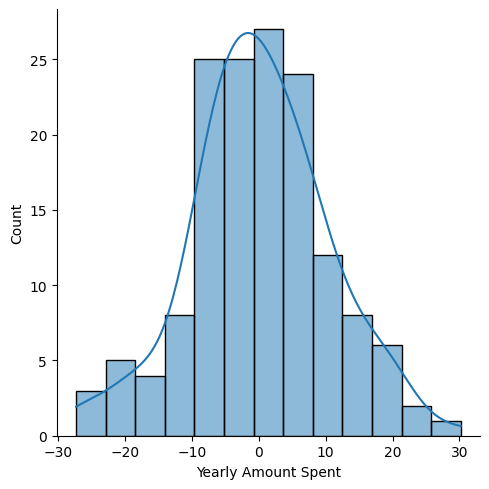

In [36]:
sns.displot(residuals, kde=True)

- most of the residuals are near zero, which means the model's predictions are mostly unbiased (not consistently over or under predicting)
- the distribution looks approximately normal which is a good sign for linear regression models.
- balanced positive and negative errors.

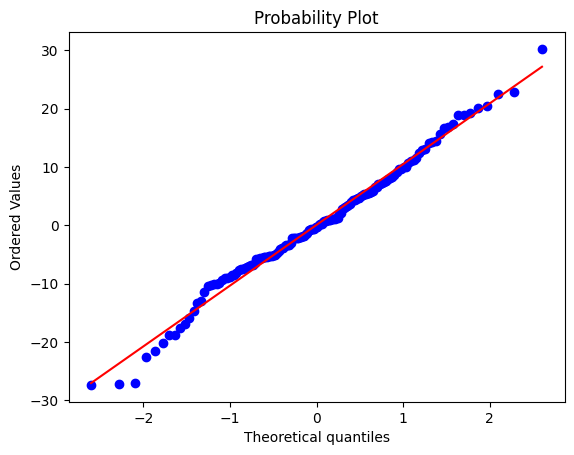

In [37]:
import pylab 
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()